In [ ]:
import h5py
import numpy as np

In [ ]:


# function to return a list of paths to each dataset
def getdatasets(key,archive):

    if key[-1] != '/': key += '/'

    out = []

    for name in archive[key]:

        path = key + name

    if isinstance(archive[path], h5py.Dataset):
        out += [path]
    else:
        out += getdatasets(path,archive)

    return out


# open HDF5-files
data     = h5py.File('/home/abhijit/Jyotirmay/my_thesis/dataset_groups/whole_body_datasets/UKB/h5_data_files/Label_test.h5','r')
# new_data = h5py.File('/home/abhijit/Jyotirmay/my_thesis/dataset_groups/whole_body_datasets/UKB/h5_data_files/Data_train_.h5','w')

# read as much datasets as possible from the old HDF5-file
datasets = getdatasets('/',data)

# get the group-names from the lists of datasets
groups = list(set([i[::-1].split('/',1)[1][::-1] for i in datasets]))
groups = [i for i in groups if len(i)>0]

# sort groups based on depth
idx    = np.argsort(np.array([len(i.split('/')) for i in groups]))
groups = [groups[i] for i in idx]

# create all groups that contain dataset that will be copied
for group in groups:
    new_data.create_group(group)

# copy datasets
for path in datasets:

    # - get group name
    group = path[::-1].split('/',1)[1][::-1]

    # - minimum group name
    if len(group) == 0: group = '/'

    # - copy data
    data.copy(path, new_data[group])

In [ ]:
# for k in data['/data']:
#     print(k.shape)
# #     break
for k in data['/label']:
    print(k.shape)

In [ ]:
new_data = h5py.File('new.hdf5','a')

In [ ]:
import glob
p = glob.glob('/home/abhijit/nas_drive/Data_WholeBody/UKBiobank/body/body_nifti/*')
print(len(p))
for i, px in enumerate(p):
    if i>10:
        break
    print(p)

In [ ]:
3//3

In [ ]:
import pandas as pd


In [ ]:
def organise_target_and_volumeid(df_path='/home/abhijit/Jyotirmay/my_thesis/projects/MC_dropout_quicknat/reports/MC_dropout_quicknat_UKB_v2/UKB/10_1573078374.453554_report.csv'):
    df = pd.read_csv(df_path)
    def replace_func(value):
        string = value[-1]
        return f'Dixon_BH_17s_opp_Dixon_BH_17{string}.nii.gz' if string == 's' else f'Dixon_BH_17s_opp_Dixon_BH_17s{string}.nii.gz'
    df['target_scan_file'] = df['volume_id'].apply(replace_func)
    df['volume_id'] = df['volume_id'].apply(lambda x: x[:-1])
    return df

In [ ]:
organise_target_and_volumeid()

In [1]:
import statsmodels.api as sm
from statsmodels.formula.api import ols, wls
from statsmodels.formula.api import mixedlm

In [2]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.iolib.table import (SimpleTable, default_txt_fmt)
np.random.seed(1024)

In [22]:
nsample = 10
x = np.linspace(0, 20, nsample)
x = [1,2,3,4,5,6,7,8,9,10]
noise = [0.80, 0.70, 0.90, 0.95, 0.70, 0.88, 0.85, 0.97, 0.95, 0.97]
y_true = x
e = np.random.normal(size=nsample)
y = np.multiply(x, noise) + e
# y = sm.add_constant(y)
x = np.array(x).T
print(x, y, y_true)
# y = np.column_stack(x**2)
# e = np.random.normal(size=nsample)

# y_true = y[0, :]
# print(y_true)
# y = y_true +  100*e
# print(y)




[ 1  2  3  4  5  6  7  8  9 10] [ 1.16865319  1.54622332  4.15651654  4.17863636  4.92829339  4.12077027
  6.8390993   7.17662513  8.59054786 11.06317269] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [23]:
res_ols = sm.OLS(y, x).fit()
print(res_ols.params)

[0.97673932]


In [24]:
prstd_ols, iv_l_ols, iv_u_ols = wls_prediction_std(res_ols)

In [28]:
mod_wls = sm.WLS(y, x, weights=np.square(noise))
res_wls = mod_wls.fit()

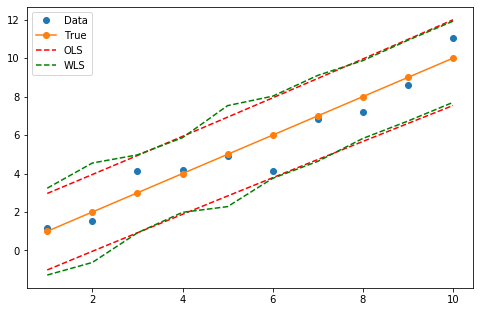

In [39]:
prstd, iv_l, iv_u = wls_prediction_std(res_wls)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label="Data")
ax.plot(x, y_true, 'o-', label="True")
# OLS
# ax.plot(x, res_ols.fittedvalues, 'r--')
ax.plot(x, iv_u_ols, 'r--', label="OLS")
ax.plot(x, iv_l_ols, 'r--')
# # WLS
# ax.plot(x, res_wls.fittedvalues, 'g--.')
ax.plot(x, iv_u, 'g--', label="WLS")
ax.plot(x, iv_l, 'g--')
ax.legend(loc="best");

In [ ]:
mod_wls = sm.WLS(y, X, weights=1./(w ** 2))
res_wls = mod_wls.fit()
print(res_wls.summary())

In [ ]:
res_ols = sm.OLS(y, X).fit()
print(res_ols.params)
print(res_wls.params)

In [30]:
data = sm.datasets.anes96.load_pandas()
party_ID = np.arange(7)
labels = ["Strong Democrat", "Weak Democrat", "Independent-Democrat",
          "Independent-Independent", "Independent-Republican",
          "Weak Republican", "Strong Republican"]

In [37]:
data.exog

,logpopul,selfLR,age,educ,income
0,-2.302585,7.0,36.0,3.0,1.0
1,5.247550,3.0,20.0,4.0,1.0
2,3.437208,2.0,24.0,6.0,1.0
3,4.420045,3.0,28.0,6.0,1.0
4,6.461624,5.0,68.0,6.0,1.0
5,4.701389,3.0,21.0,4.0,1.0
6,4.606170,5.0,77.0,4.0,1.0
7,3.437208,5.0,21.0,4.0,1.0
8,5.193512,4.0,31.0,4.0,1.0
9,7.937410,3.0,39.0,3.0,1.0


[4      68.0
9      39.0
13     42.0
14     74.0
15     62.0
       ... 
889    54.0
901    26.0
918    36.0
925    48.0
937    43.0
Name: age, Length: 200, dtype: float64, 1      20.0
2      24.0
3      28.0
5      21.0
6      77.0
       ... 
911    38.0
912    51.0
913    47.0
919    35.0
930    40.0
Name: age, Length: 180, dtype: float64, 20     88.0
21     20.0
22     27.0
30     26.0
44     43.0
       ... 
921    53.0
922    33.0
928    70.0
929    39.0
933    46.0
Name: age, Length: 108, dtype: float64, 8      31.0
52     69.0
73     47.0
79     30.0
80     73.0
115    21.0
125    36.0
130    27.0
138    42.0
142    52.0
184    46.0
220    27.0
238    68.0
419    39.0
423    79.0
449    41.0
495    44.0
527    63.0
542    63.0
589    40.0
640    42.0
685    40.0
700    44.0
701    78.0
721    47.0
728    36.0
739    53.0
768    24.0
796    40.0
843    55.0
853    46.0
856    53.0
869    48.0
891    48.0
902    49.0
910    49.0
943    61.0
Name: age, dtype: float64, 7      21.0


Text(0, 0.5, 'Age')

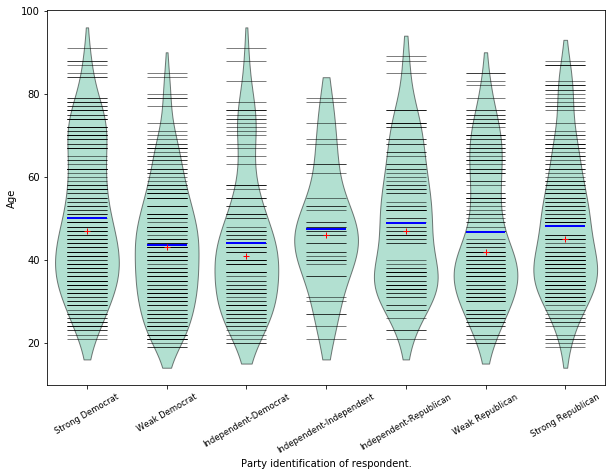

In [36]:
plt.rcParams['figure.subplot.bottom'] = 0.23  # keep labels visible
plt.rcParams['figure.figsize'] = (10.0, 8.0)  # make plot larger in notebook
age = [data.exog['age'][data.endog == id] for id in party_ID]
fig = plt.figure()
ax = fig.add_subplot(111)
plot_opts={'cutoff_val':5, 'cutoff_type':'abs',
                                'label_fontsize':'small',
                                'label_rotation':30}
sm.graphics.beanplot(age, ax=ax, labels=labels,
                     plot_opts=plot_opts)
ax.set_xlabel("Party identification of respondent.")
ax.set_ylabel("Age")
#plt.show()